<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Advanced Solid-State Physics <br>
<font color=2565AE size=5>
    Simulating 2D Diatomic Lattice Phonons (Longitudinal Acoustic & Optical Modes) <br>
    Winter 2026<br>
<font color=3C99D size=5>
    Amirhossein Zahedi 404211388 <br>
<font color=696880 size=4>

# Theory
---
### Physics Model (1D Diatomic Chain)

Consider a 1D diatomic lattice with:
* Masses $M$ and $m$
* Spring constant $K$
* Lattice constant $a$

Let:
* $u_n$ = displacement of mass $M$
* $v_n$ = displacement of mass $m$
---
### Equations of Motion
$$
\begin{aligned}
M \ddot{u}_n &= K(v_n - u_n) + K(v_{n-1} - u_n) \\
m \ddot{v}_n &= K(u_n - v_n) + K(u_{n+1} - v_n)
\end{aligned}
$$
---
### Plane Wave Solution

Assume:

$$
\begin{aligned}
u_n &= U e^{i(kna-\omega t)} \\
v_n &= V e^{i(kna-\omega t)}
\end{aligned}
$$

This gives dispersion relation:

$$
\omega^2(k) = K \left( \frac{1}{M} + \frac{1}{m} \right) \pm K \sqrt{\left( \frac{1}{M} + \frac{1}{m} \right)^2 - \frac{4}{Mm} \sin^2 \left( \frac{ka}{2} \right)}
$$

* **Minus sign** $\rightarrow$ Acoustic branch
* **Plus sign** $\rightarrow$ Optical branch
---


 ### Physics Model (2D Diatomic Chain)

The wavevector is:

$$
\mathbf{k} = (k_x, k_y)
$$
---
### Plane Wave Solution

We assume plane wave solutions:

$$
\mathbf{u}(\mathbf{r},t)
= \mathbf{U} e^{i(\mathbf{k}\cdot\mathbf{r} - \omega t)}
$$

$$
\mathbf{v}(\mathbf{r},t)
= \mathbf{V} e^{i(\mathbf{k}\cdot\mathbf{r} - \omega t)}
$$

For **longitudinal modes**, displacement is parallel to $\mathbf{k}$:

$$
\hat{\mathbf{k}} = \frac{\mathbf{k}}{|\mathbf{k}|}
$$

$$
\mathbf{U} = U_L \hat{\mathbf{k}}, \quad
\mathbf{V} = V_L \hat{\mathbf{k}}
$$

---
### 2D Structure Factor

For a square lattice with four nearest neighbors:

$$
\Gamma(\mathbf{k}) =
4 - 2\cos(k_x a) - 2\cos(k_y a)
$$

This comes from summing restoring forces from neighbors in
$\pm x$ and $\pm y$ directions.

---
### Longitudinal Dynamical Matrix

The problem reduces to a $2 \times 2$ matrix:

$$
D(\mathbf{k}) =
K \Gamma(\mathbf{k})
\begin{pmatrix}
\frac{1}{M} & -\frac{1}{\sqrt{Mm}} \\
-\frac{1}{\sqrt{Mm}} & \frac{1}{m}
\end{pmatrix}
$$

The eigenvalue equation is:

$$
\det\left[D - \omega^2 I \right] = 0
$$

---
### Eigenfrequencies

Solving gives:

$$
\omega^2_{\pm}(\mathbf{k}) =
\frac{K \Gamma(\mathbf{k})}{2}
\left[
\left(\frac{1}{M} + \frac{1}{m}\right)
\pm
\sqrt{
\left(\frac{1}{M} + \frac{1}{m}\right)^2
-
\frac{4}{Mm}
}
\right]
$$

- $-$ branch → **Longitudinal Acoustic (LA)**
- $+$ branch → **Longitudinal Optical (LO)**

---
### Small-$k$ Limit

For small wavevector:

$$
\cos(k_x a) \approx 1 - \frac{(k_x a)^2}{2}
$$

$$
\cos(k_y a) \approx 1 - \frac{(k_y a)^2}{2}
$$

So:

$$
\Gamma(\mathbf{k}) \approx a^2 (k_x^2 + k_y^2)
$$

Acoustic branch becomes:

$$
\omega^2 \approx
\frac{K a^2}{M+m}
(k_x^2 + k_y^2)
$$

Thus:

$$
\omega \approx v_s |\mathbf{k}|
$$

with sound velocity:

$$
v_s = a \sqrt{\frac{K}{M+m}}
$$

At $\mathbf{k}=0$:

$$
\omega_{\text{LA}} = 0
$$

$$
\omega_{\text{LO}} =
\sqrt{
K \Gamma(0)
\left(\frac{1}{M} + \frac{1}{m}\right)
}
\neq 0
$$
---

## Simulation

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from numpy import double


plt.rcParams['figure.figsize'] = (8,6)

M = 2
m = 1
K = 1
a = 1

Nx, Ny = 10, 10
frames = 70
tmax = 20

Dispersion Function

In [305]:
def omega_longitudinal(kx, ky, branch):
    Gamma = 4 - 2*np.cos(kx*a) - 2*np.cos(ky*a)
    
    pref = K * Gamma / 2
    A = (1/M + 1/m)
    B = np.sqrt(A**2 - 4/(M*m))
    
    if branch == "acoustic":
        return np.sqrt(pref * (A - B))
    elif branch == "optical":
        return np.sqrt(pref * (A + B))

Lattice Setup -> 
We can change kx and ky to observe differnt ks.

In [306]:
x = np.arange(Nx)*a
y = np.arange(Ny)*a
X, Y = np.meshgrid(x, y)

X2 = X + a/2
Y2 = Y + a/2
        
kx = 0.25 * np.pi
ky = 0.25 * np.pi

k_mag = np.sqrt(kx**2 + ky**2)
k_hat = np.array([kx, ky]) / k_mag

t = np.linspace(0, tmax, frames)

LA & LO Animation

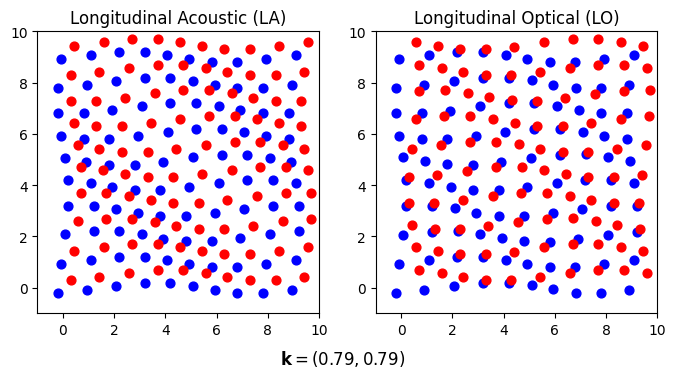

In [307]:
fig, axes = plt.subplots(1,2)

ax_LA, ax_LO = axes

for ax in axes:
    ax.set_xlim(-1, Nx)
    ax.set_ylim(-1, Ny)
    ax.set_aspect('equal')

ax_LA.set_title("Longitudinal Acoustic (LA)")
ax_LO.set_title("Longitudinal Optical (LO)")

scM_LA = ax_LA.scatter(X, Y, s=40, c='blue')
scm_LA = ax_LA.scatter(X2, Y2, s=40, c='red')

scM_LO = ax_LO.scatter(X, Y, s=40, c='blue')
scm_LO = ax_LO.scatter(X2, Y2, s=40, c='red')

omega_LA = omega_longitudinal(kx, ky, "acoustic")
omega_LO = omega_longitudinal(kx, ky, "optical")

def update(frame):
    time = t[frame]
    phase = kx*X + ky*Y
    
    # LA
    disp_LA = 0.3*np.cos(phase - omega_LA*time)
    dx = disp_LA * k_hat[0]
    dy = disp_LA * k_hat[1]
    
    scM_LA.set_offsets(np.c_[(X+dx).flatten(),
                             (Y+dy).flatten()])
    scm_LA.set_offsets(np.c_[(X2+dx).flatten(),
                             (Y2+dy).flatten()])
    
    # LO
    disp_LO = 0.3*np.cos(phase - omega_LO*time)
    dx2 = disp_LO * k_hat[0]
    dy2 = disp_LO * k_hat[1]
    
    scM_LO.set_offsets(np.c_[(X+dx2).flatten(),
                             (Y+dy2).flatten()])
    scm_LO.set_offsets(np.c_[(X2-dx2).flatten(),
                             (Y2-dy2).flatten()])
    
    return scM_LA, scm_LA, scM_LO, scm_LO

ax_LA.text(0.86, -0.18,
           fr"$\mathbf{{k}}=({kx:.2f},{ky:.2f})$",
           transform=ax_LA.transAxes,
           fontsize=12)

ani = FuncAnimation(fig, update, frames=frames)

ani.save("2D_LA_LO.gif", writer=PillowWriter(fps=20))


plt.show()

It is shown that phonon velocity in the optical wave is more that the ocoustic wave. k = (0.79,0.79) is an amusing gif.